# Project 3: Test a Perceptual Phenomenon
Compute descriptive statistics and perform a statistical test on a data set based on a psychological phenomenon, the Stroop Effect.

##  By: Cory Robbins
### February 7, 2021

In a Stroop test, participants are presented with a list of words, with each word displayed in a color. The participant’s task is to say out loud the color of the ink in which the word is printed. 

The task has two conditions: 
- 1.) Congruent words condition: Congruent words match the colors in which they are printed: for example RED, BLUE. 
- 2.) Incongruent words condition: Incongruent words do not match the colors in which they are printed: for example PURPLE, ORANGE.  

In each case, each participant will go through and record the time it takes to name the color ("Response Time") from each condition. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import os
%matplotlib inline

path = r'/Users/coryrobbins/projects/AIRBUS_Data-Analyst-Nanodegree_Udacity/M5_inferential_statistics/Project3_StroopEffect/stroopdata.csv'
data = pd.read_csv(path)


In [36]:
#change the indexing to reflect the 'participant' column
data['participant'] = data.index+1
data.index = data['participant'] 
del data['participant'] 
data.head()

Congruent  Incongruent
participant                        
1               12.079       19.278
2               16.791       18.741
3                9.564       21.214
4                8.630       15.687
5               14.669       22.803

## Question 1: Identify variables in the experiment
Q1: Question response correctly identifies the independent and dependent variables in the experiment.

>Independent variable: An one of the two conditions; congruient or incongruent

>Dependent variable: Response times

## Question 2a: Establish hypotheses

#### Q2a:
- Null and alternative hypotheses are clearly stated in words and mathematically. 
- Symbols in the mathematical statement are defined.


* What is an appropriate set of hypotheses for this task? 
* What kind of statistical test do you expect to perform? 
* Justify your choices.

## Question 2b: Establish a statistical test

#### Q2b: 
* A statistical test is proposed which will distinguish the proposed hypotheses. 
* Any assumptions made by the statistical test are addressed.



#### The Null Hypothesis (Ho):

- There won’t be a lot of time difference between the mean response times of Congruent and Incongruent conditions 

        i.e., Ho: μC - μI = 0

#### The Alternative Hypothesis (Ha):

- The mean time of participants' response time in performing incongruent task compared to congruent task is faster

        i.e., Ha: μC – μI ≠ 0

## Question 3: Report descriptive statistics

Q3: Descriptive statistics, including at least one measure of centrality and one measure of variability, have been computed for the dataset’s groups.


In [37]:
# Report some descriptive statistics regarding this dataset. 
# Include at least one measure of central tendency and at least 
#one measure of variability.

In [38]:
# Summary Descriptive Statistics
data.describe().T

count       mean       std     min       25%      50%       75%  \
Congruent     24.0  14.051125  3.559358   8.630  11.89525  14.3565  16.20075   
Incongruent   24.0  22.015917  4.797057  15.687  18.71675  21.0175  24.05150   

                max  
Congruent    22.328  
Incongruent  35.255

In [39]:
# Mode for congruent condition
data["Congruent"].mode().head()

0     8.630
1     8.987
2     9.401
3     9.564
4    10.639
dtype: float64

In [40]:
# Mode for Incongruent condition
data["Incongruent"].mode().head()

0    15.687
1    17.394
2    17.425
3    17.510
4    17.960
dtype: float64

In [41]:
#Standard deviation
data.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [42]:
#calculating variance and squared deviation
datanow = data.copy()

datanow['CongruentDeviationFromMean'] = abs(datanow['Congruent'] - datanow['Congruent'].mean())
datanow['CongruentSquareDevation'] = abs(datanow['Congruent'] - datanow['Congruent'].mean())**2

datanow['IncongruentDeviationFromMean'] = abs(datanow['Incongruent'] - datanow['Incongruent'].mean())
datanow['IncongruentSquareDevation'] = abs(datanow['Incongruent'] - datanow['Incongruent'].mean())**2

datanow.head()

Congruent  Incongruent  CongruentDeviationFromMean  \
participant                                                       
1               12.079       19.278                    1.972125   
2               16.791       18.741                    2.739875   
3                9.564       21.214                    4.487125   
4                8.630       15.687                    5.421125   
5               14.669       22.803                    0.617875   

             CongruentSquareDevation  IncongruentDeviationFromMean  \
participant                                                          
1                           3.889277                      2.737917   
2                           7.506915                      3.274917   
3                          20.134291                      0.801917   
4                          29.388596                      6.328917   
5                           0.381770                      0.787083   

             IncongruentSquareDevation  
participant                             
1                             7.496188  
2                            10.725079  
3                             0.643070  
4                            40.055186  
5                             0.619500

In [43]:
congruentvariance = ((datanow.CongruentSquareDevation).sum())/(datanow['Congruent'].count()-1)
congruentvariance

12.669029070652176

In [54]:
incongruentvariance = ((datanow.IncongruentSquareDevation).sum())/(datanow['Incongruent'].count()-1)
incongruentvariance

23.011757036231884

## Question 4: Plot the data

#### Q4: 
* One or two visualizations have been created that show the distribution of the sample


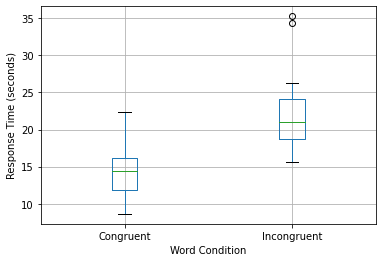

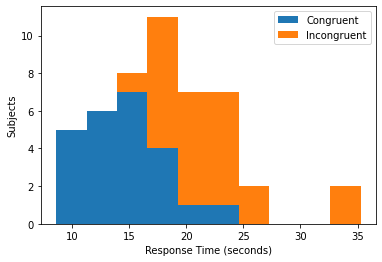

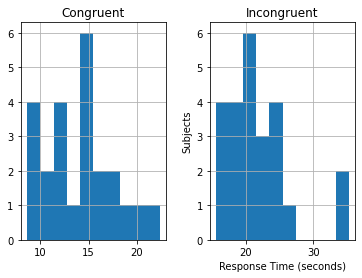

In [55]:

# Boxplot
data.boxplot()
plt.xlabel('Word Condition')
plt.ylabel('Response Time (seconds)')

# Histogram 
data.plot(kind='hist', stacked=True, bins=10)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Subjects')
plt.show()
data.hist(bins=10)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Subjects')
plt.show()


Text(0.5, 1.0, 'Congruent plot')

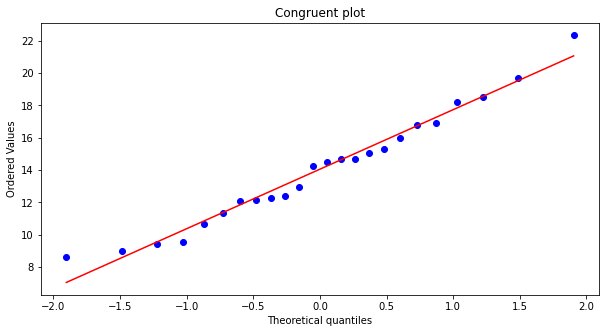

In [56]:
plt.figure(figsize=(10, 5))
stats.probplot(data['Congruent'], plot=plt)
#stats.probplot(data['Incongruent'], plot=plt)
plt.title('Congruent plot')

Text(0.5, 1.0, 'Incongruent plot')

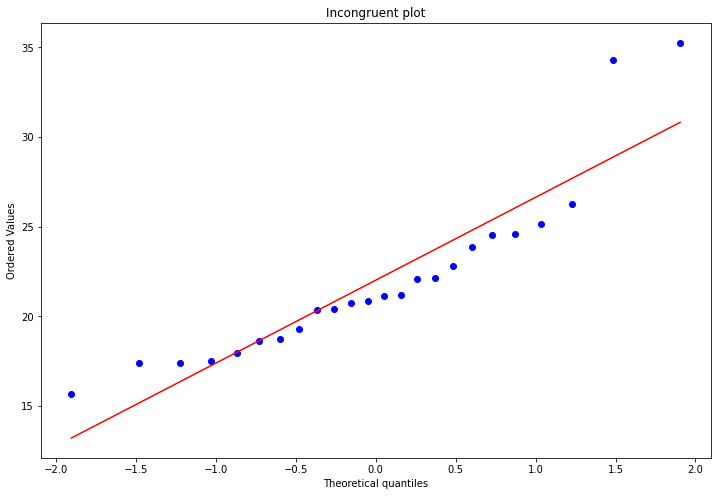

In [57]:
plt.figure(figsize=(12, 8))
#stats.probplot(data['Inongruent'], plot=plt)
stats.probplot(data['Incongruent'], plot=plt)
plt.title('Incongruent plot')

#### Question 5: Perform the statistical test and interpret your results

Q5: A statistical test has been correctly performed and reported, including test statistic, p-value, and test result. The test results are interpreted in terms of the experimental task performed. Alternatively, students may use a bootstrapping approach to simulate the results of a traditional hypothesis test.


In [48]:
# Now, perform the statistical test and report your results. 
# What is your confidence level and your critical statistic value? 
# Do you reject the null hypothesis or fail to reject it? Come 
# to a conclusion in terms of the experiment task. 
# Did the results match up with your expectations?

In [59]:
#find degrees of freesom and the t*critical values for a one-tailed positive test
#Calculate the t-statistic
n = len(data)
c = data['Congruent']
i = data['Incongruent']

ttest = stats.ttest_rel(c,i)

print("Sample Size (n) =", n, "subjects")
print("degrees of freedom (data) =", (n-1))
print("T-Test Result =", ttest)

ttest = stats.ttest_rel(data['Incongruent'], data['Congruent'])

Sample Size (n) = 24 subjects
degrees of freedom (data) = 23
T-Test Result = Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)


#### Question 6: Digging deeper and extending the investigation Question 6 is optional and does not need to be answered in order to meet project specifications.

#Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!